In [ ]:
# Import necessary libraries
from transformers import pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('car_reviews.csv')

# Define the categories for classification
categories = [
    "talks about driving experience",
    "talks about features",
    "talks about value for money",
    "talks about issues",
    "other"  
]

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Function to classify a single review
def classify_review(review):
    try:
        result = classifier(review, candidate_labels=categories)
        return result['labels'][0]  # Return the label with the highest score
    except Exception as e:
        return "error"  # Handle exceptions and return "error" for problematic reviews

# Apply classification to each review
df['talks_about'] = df['Review'].apply(classify_review)

# Save the updated dataset
df.to_csv('classified_car_reviews.csv', index=False)

# Display the first few rows of the updated dataset
print(df.head())

The `facebook/bart-large-mnli` model is a great choice for zero-shot classification because it can handle tasks without needing specific training for each one. This means you can classify text into categories, even if the model hasn’t seen those categories before, as long as you provide the labels in plain language. It’s built on the powerful BART architecture and fine-tuned with high-quality data, making it reliable for understanding and categorizing text in various contexts. Its ability to work across different domains like healthcare, finance, and social media makes it very flexible and useful for many tasks.

Another reason to choose this model is its ease of use and strong performance. It’s open-source and readily available, with support from the Hugging Face community, so you can quickly integrate it into your projects. The model works well for both single-label and multi-label classification, and it’s designed to handle dynamic or new categories without additional training. Whether you’re dealing with changing categories or don’t have labeled data to train a custom model, `facebook/bart-large-mnli` is a dependable option that saves time while delivering accurate results.

/var/folders/99/dwltf5hs6nj8g1pnc91r55fw0000gn/T/ipykernel_6910/621447610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


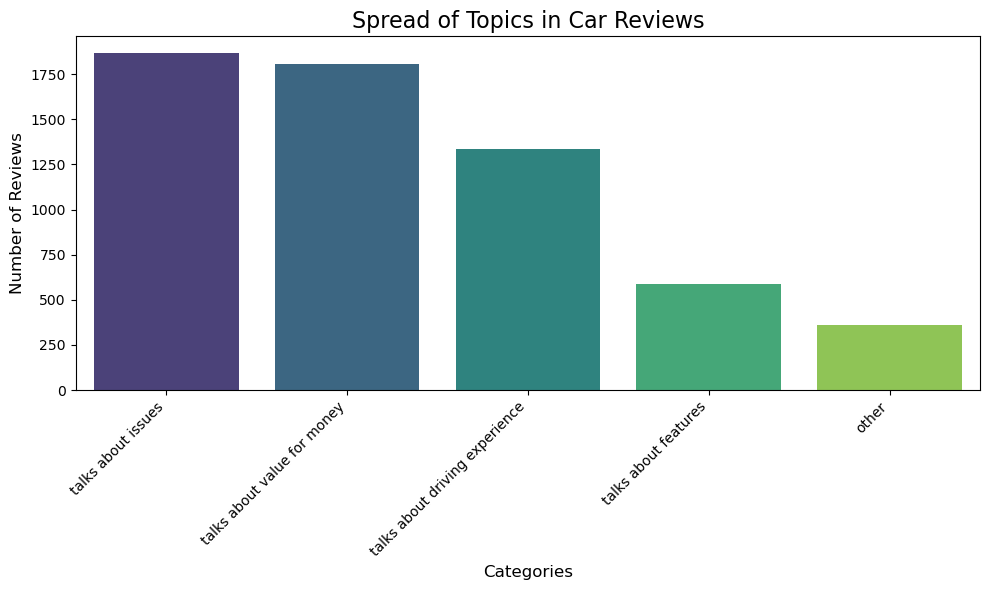

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv('classified_car_reviews.csv')
# Count the occurrences of each category in 'talks_about'
category_counts = df['talks_about'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels and title
plt.title("Spread of Topics in Car Reviews", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()